In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import math
from PIL import Image

In [2]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [3]:
with open('model_files/blaze_face_short_range.tflite', 'rb') as f:
    model = f.read()
    f.close()

In [4]:
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

In [5]:
options = FaceDetectorOptions(
base_options = BaseOptions(model_asset_buffer=model),
running_mode = VisionRunningMode.IMAGE)

In [140]:
with FaceDetector.create_from_options(options) as detector:
    mp_image = mp.Image.create_from_file('pics/me.jpg')
    face_detector_result = detector.detect(mp_image)
    print(face_detector_result)

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=971, origin_y=628, width=733, height=733), categories=[Category(index=0, score=0.9559603929519653, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.5097390413284302, y=0.2812787890434265, label='', score=0.0), NormalizedKeypoint(x=0.6364763975143433, y=0.2941150367259979, label='', score=0.0), NormalizedKeypoint(x=0.5689910054206848, y=0.3461749255657196, label='', score=0.0), NormalizedKeypoint(x=0.5589147806167603, y=0.39968323707580566, label='', score=0.0), NormalizedKeypoint(x=0.4277344048023224, y=0.3011331558227539, label='', score=0.0), NormalizedKeypoint(x=0.6986592411994934, y=0.3302203118801117, label='', score=0.0)])])


In [141]:
type(face_detector_result)

mediapipe.tasks.python.components.containers.detections.DetectionResult

In [142]:
face_detector_result.detections[0].bounding_box

BoundingBox(origin_x=971, origin_y=628, width=733, height=733)

In [9]:
face_detector_result.detections[0].categories[0]

Category(index=0, score=0.9559603929519653, display_name=None, category_name=None)

In [10]:
face_detector_result.detections[0].keypoints

[NormalizedKeypoint(x=0.5097390413284302, y=0.2812787890434265, label='', score=0.0),
 NormalizedKeypoint(x=0.6364763975143433, y=0.2941150367259979, label='', score=0.0),
 NormalizedKeypoint(x=0.5689910054206848, y=0.3461749255657196, label='', score=0.0),
 NormalizedKeypoint(x=0.5589147806167603, y=0.39968323707580566, label='', score=0.0),
 NormalizedKeypoint(x=0.4277344048023224, y=0.3011331558227539, label='', score=0.0),
 NormalizedKeypoint(x=0.6986592411994934, y=0.3302203118801117, label='', score=0.0)]

In [11]:
x = face_detector_result.detections[0].bounding_box.origin_x
y = face_detector_result.detections[0].bounding_box.origin_y
w = face_detector_result.detections[0].bounding_box.width
h = face_detector_result.detections[0].bounding_box.height
score = round(face_detector_result.detections[0].categories[0].score, 3)

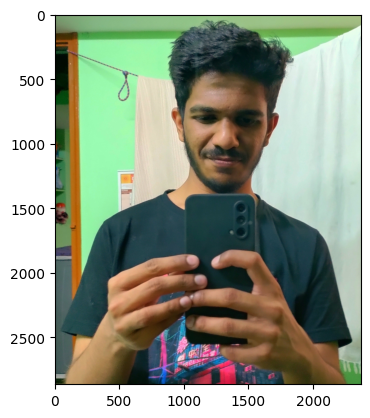

In [44]:
img = cv2.imread('pics/me.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

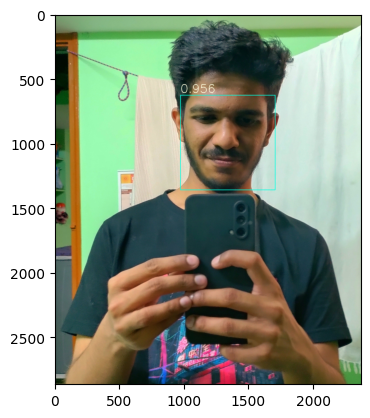

In [13]:
img2 = cv2.putText(img, str(score), (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 225), 3)
img2 = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 225), 3)
plt.imshow(img2)

In [14]:
img_x, img_y, _ = img.shape

In [15]:
# Keypoints
k1_x = face_detector_result.detections[0].keypoints[0].x
k1_y = face_detector_result.detections[0].keypoints[0].y

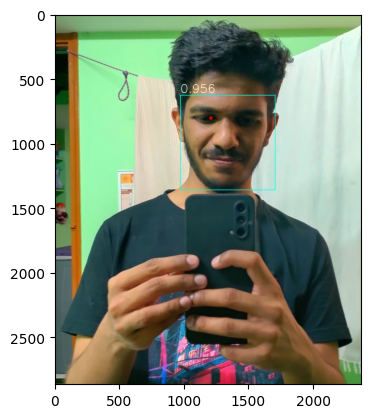

In [16]:
img3 = cv2.circle(img, (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1)), 8, (255, 0, 0), 8)
plt.imshow(img3)

In [17]:
with FaceDetector.create_from_options(options) as detector:
    mp_image = mp.Image.create_from_file('pics/pic1.jpg')
    face_detector_result2 = detector.detect(mp_image)
    print(face_detector_result)

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=971, origin_y=628, width=733, height=733), categories=[Category(index=0, score=0.9559603929519653, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.5097390413284302, y=0.2812787890434265, label='', score=0.0), NormalizedKeypoint(x=0.6364763975143433, y=0.2941150367259979, label='', score=0.0), NormalizedKeypoint(x=0.5689910054206848, y=0.3461749255657196, label='', score=0.0), NormalizedKeypoint(x=0.5589147806167603, y=0.39968323707580566, label='', score=0.0), NormalizedKeypoint(x=0.4277344048023224, y=0.3011331558227539, label='', score=0.0), NormalizedKeypoint(x=0.6986592411994934, y=0.3302203118801117, label='', score=0.0)])])


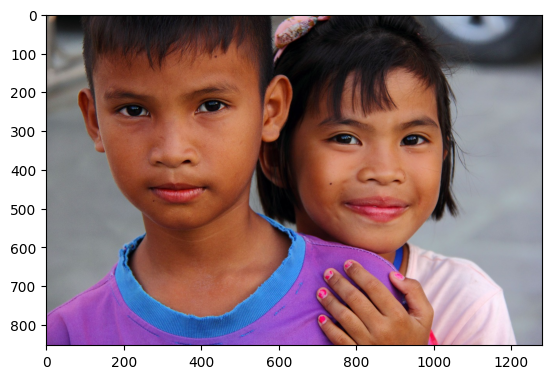

In [18]:
# plt.figure(figsize = (10, 6))
img = cv2.imread('pics/pic1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [19]:
# Keypoints
k1_x = face_detector_result2.detections[1].keypoints[0].x
k1_y = face_detector_result2.detections[1].keypoints[0].y

In [20]:
img_x, img_y, _ = img.shape

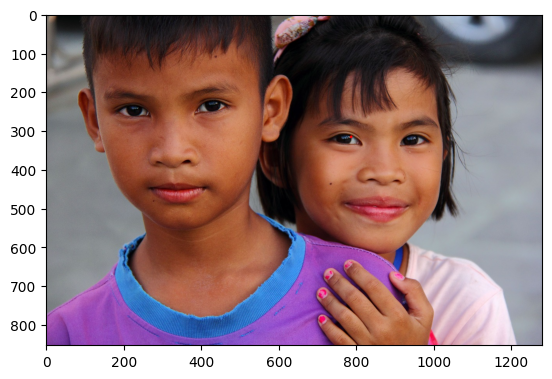

In [21]:
img3 = cv2.circle(img, (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1)), 2, (255, 0, 0), 2)
plt.imshow(img3)

In [22]:
with FaceDetector.create_from_options(options) as detector:
    mp_image = mp.Image.create_from_file('pics/pic2.jpg')
    face_detector_result3 = detector.detect(mp_image)
    print(face_detector_result)

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=971, origin_y=628, width=733, height=733), categories=[Category(index=0, score=0.9559603929519653, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.5097390413284302, y=0.2812787890434265, label='', score=0.0), NormalizedKeypoint(x=0.6364763975143433, y=0.2941150367259979, label='', score=0.0), NormalizedKeypoint(x=0.5689910054206848, y=0.3461749255657196, label='', score=0.0), NormalizedKeypoint(x=0.5589147806167603, y=0.39968323707580566, label='', score=0.0), NormalizedKeypoint(x=0.4277344048023224, y=0.3011331558227539, label='', score=0.0), NormalizedKeypoint(x=0.6986592411994934, y=0.3302203118801117, label='', score=0.0)])])


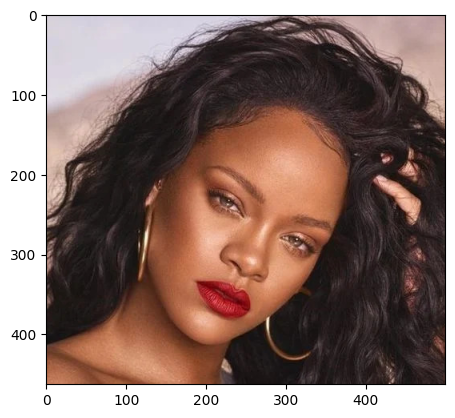

In [71]:
img = cv2.imread('pics/pic2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [24]:
img_x, img_y, _ = img.shape

In [30]:
# Keypoints
k1_x = face_detector_result3.detections[0].keypoints[0].x
k1_y = face_detector_result3.detections[0].keypoints[0].y

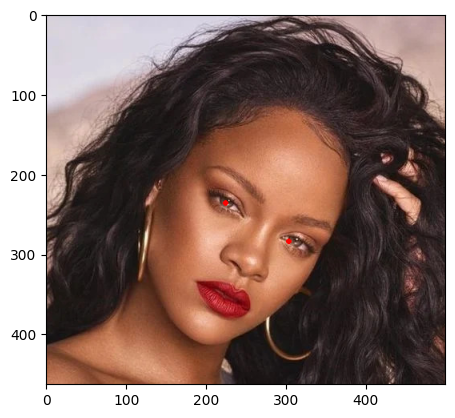

In [31]:
img4 = cv2.circle(img, (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1)), 2, (255, 0, 0), 2)
plt.imshow(img4)

In [33]:
k1_y

0.5115591883659363

In [37]:
left_eye_x, left_eye_y = (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1))

In [41]:
print(left_eye_x)
print(left_eye_y)

224
236


In [42]:
k1_x = face_detector_result3.detections[0].keypoints[1].x
k1_y = face_detector_result3.detections[0].keypoints[1].y
right_eye_x, right_eye_y = (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1))

In [43]:
print(right_eye_x)
print(right_eye_y)

303
284


In [49]:
third_point = (left_eye_x, right_eye_y)
third_point

(224, 284)

In [61]:
left_eye = (left_eye_x, left_eye_y)
right_eye = (right_eye_x, right_eye_y)

In [62]:
def eucledian_distance(a, b):
    x1, y1 = a[0], a[1]
    x2, y2 = b[0], b[1]
    return math.sqrt(((x2 - x1)*(x2 - x1)) + ((y2 - y1)*(y2 - y1)))

In [65]:
h = eucledian_distance(left_eye, right_eye)
b = eucledian_distance(right_eye, third_point)

In [66]:
angle = np.arccos(b/h)

In [67]:
angle

0.5459853055057382

In [68]:
angle = (angle * 180)/math.pi
angle

31.28265368163967

In [69]:
new_img = Image.fromarray(img)
new_img = np.array(new_img.rotate(angle))

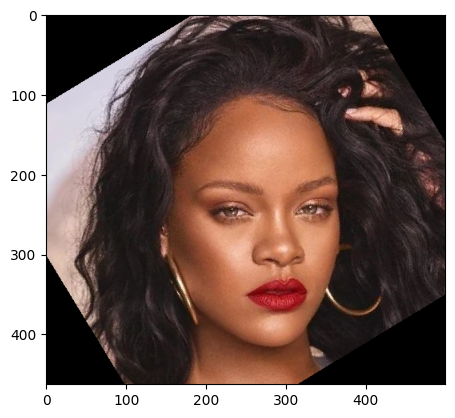

In [70]:
plt.imshow(new_img)

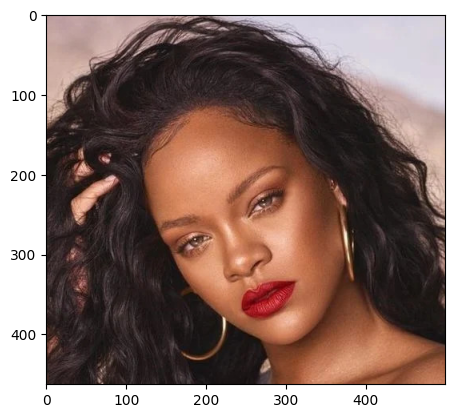

In [94]:
img_flip = cv2.flip(img, 1)
plt.imshow(img_flip)

In [95]:
with FaceDetector.create_from_options(options) as detector:
    mp_image = mp.Image(image_format = mp.ImageFormat.SRGB, data = img_flip)
    face_detector_result4 = detector.detect(mp_image)
    print(face_detector_result)

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=971, origin_y=628, width=733, height=733), categories=[Category(index=0, score=0.9559603929519653, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.5097390413284302, y=0.2812787890434265, label='', score=0.0), NormalizedKeypoint(x=0.6364763975143433, y=0.2941150367259979, label='', score=0.0), NormalizedKeypoint(x=0.5689910054206848, y=0.3461749255657196, label='', score=0.0), NormalizedKeypoint(x=0.5589147806167603, y=0.39968323707580566, label='', score=0.0), NormalizedKeypoint(x=0.4277344048023224, y=0.3011331558227539, label='', score=0.0), NormalizedKeypoint(x=0.6986592411994934, y=0.3302203118801117, label='', score=0.0)])])


In [96]:
img_x, img_y, _ = img_flip.shape

In [112]:
k1_x = face_detector_result4.detections[0].keypoints[0].x
k1_y = face_detector_result4.detections[0].keypoints[0].y
left_eye_x, left_eye_y = (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1))

In [113]:
k1_x = face_detector_result4.detections[0].keypoints[1].x
k1_y = face_detector_result4.detections[0].keypoints[1].y
right_eye_x, right_eye_y = (min(math.floor(k1_x * img_y), img_y - 1), min(math.floor(k1_y * img_x), img_x - 1))

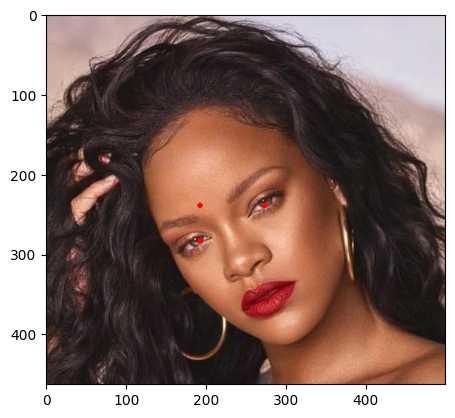

In [114]:
img4 = cv2.circle(img_flip, third_point, 2, (255, 0, 0), 2)
plt.imshow(img4)

In [115]:
third_point = (left_eye_x, right_eye_y)

In [116]:
left_eye = (left_eye_x, left_eye_y)
right_eye = (right_eye_x, right_eye_y)

In [117]:
h = eucledian_distance(left_eye, right_eye)
b = eucledian_distance(right_eye, third_point)

In [120]:
angle = (np.arccos(b/h) * 180)/math.pi

In [121]:
angle

28.511246294108748

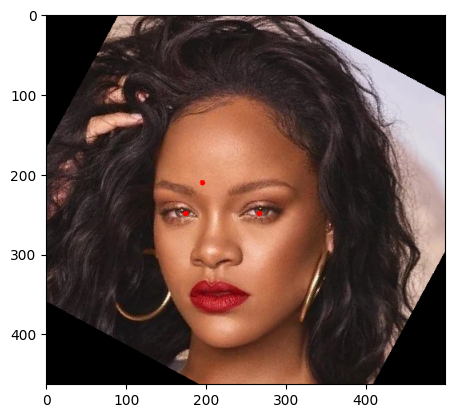

In [123]:
new_img = Image.fromarray(img_flip)
new_img = np.array(new_img.rotate(-angle))
plt.imshow(new_img)

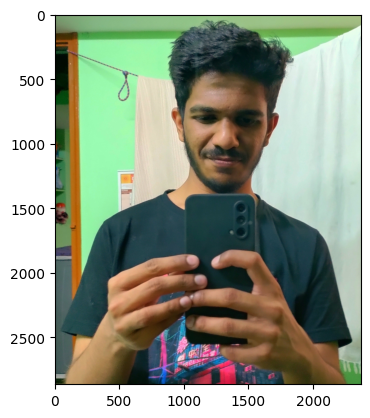

In [124]:
img = cv2.imread('pics/me.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [125]:
img.shape

(2864, 2369, 3)

In [ ]:
# origin_x=971, origin_y=628, width=733, height=733

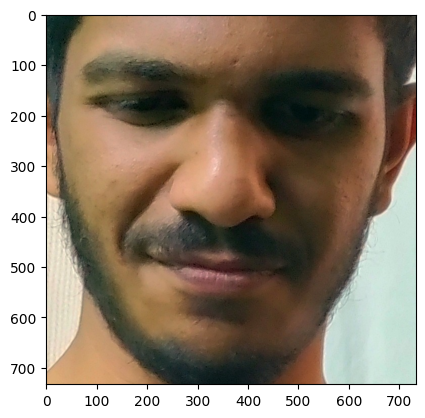

In [143]:
plt.imshow(img[628:628+733, 971:971+733])

In [145]:
cv2.imwrite("pics/me_bound.jpg", img[628:628+733, 971:971+733, ::-1])

True